In [47]:
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np


# 图的创建和清空

In [6]:
G = nx.Graph() # 创建无向图
G = nx.DiGraph() # 创建有向图
G = nx.MultiGraph() # 创建多重无向图
G.clear() #清空图

# 节点操作


### 节点增加

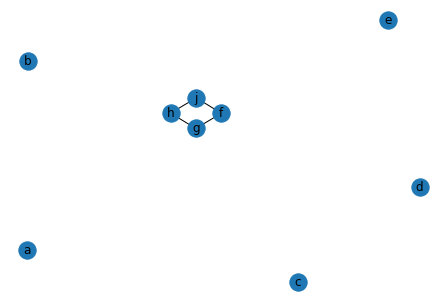

In [13]:
G = nx.Graph()                 #建立一个空的无向图G
G.add_node('a')                  #添加一个节点1
G.add_nodes_from(['b','c','d','e'])    #加点集合
nx.add_cycle(G,['f','g','h','j'])         #加环

nx.draw(G, with_labels=True)  # 画图，with_labels表示图中带有节点名称label


### 节点访问

In [14]:
print('图中所有的节点', G.nodes())  # G.nodes()返回所有节点组成的列表。
print('图中节点的个数', G.number_of_nodes())

图中所有的节点 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']
图中节点的个数 9


### 删除节点

In [21]:
#G.remove_node("b")    #删除指定节点
G.remove_nodes_from(['c','d','e'])    # 删除集合中的节点

# 边操作

###  增加边

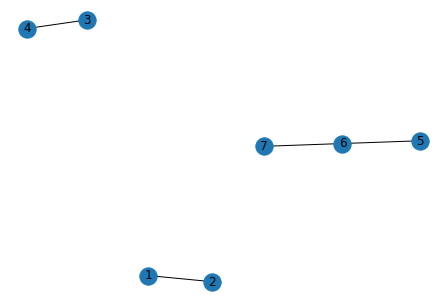

In [22]:
F = nx.Graph() # 创建无向图
F.add_edge(1,2)   #一次添加一条边
#等价于以下代码
e=(3,4)        #e是一个元组
F.add_edge(*e) #这是python中解包裹的过程
F.add_edges_from([(5,6),(6,7)])     #通过添加list来添加多条边

nx.draw(F, with_labels=True)  # 画图
plt.show()

### 访问边 

In [23]:
print('图中所有的边', F.edges())  #F.edges()返回一个列表，列表中每个元组表示一条边：

print('图中边的个数', F.number_of_edges())

图中所有的边 [(1, 2), (3, 4), (5, 6), (6, 7)]
图中边的个数 4


### 删除边

In [24]:
F.remove_edge(1,2)  # 删除单条边
F.remove_edges_from([(3,4), (5,6)])  # 根据列表删除一组边

# 属性
图、边、节点都可以有自己的属性，比如weight、color、label、alpha等。
图、边和节点的属性都是通过一个字典来保存的，默认字典为空，即没有属性。

### 图的属性

In [28]:
G1 = nx.Graph(day='Monday', name='graph', time='5.00', color='red')    #可以在创建图时分配图的属性
print(G1.graph)

G1.graph['day'] = 'Friday'  # 修改图的属性
print(G1.graph)

{'day': 'Friday', 'name': 'graph', 'time': '5.00', 'color': 'red'}
{'day': 'Friday', 'name': 'graph', 'time': '5.00', 'color': 'red'}


In [31]:
#nx.draw(G1,with_labels=True)
#plt.show()

G1.nodes()

NodeView(())

### 节点属性

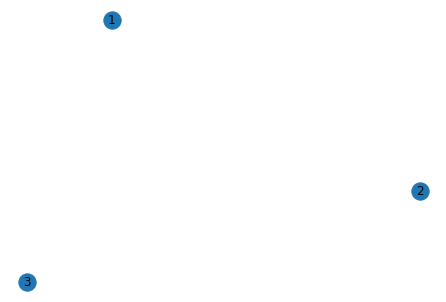

In [35]:
G = nx.Graph(day='Monday', name='graph', time='5.00', color='red')    #可以在创建图时分配图的属性

G.add_node(1, size=1, color='blue', alpha=1, name='node1')  # 添加单个节点时，指定节点属性

G.add_nodes_from([(2, {'size': 2, 'color': 'blue'}), (3, {'size': 3, 'color': 'greed'})])  # 从列表批量添加节点时，每个节点和属性字典组成tuple

G.nodes[1]['size'] = 10  # 修改节点属性

nx.draw(G, with_labels=True)
plt.show()

#注意，这里节点的属性和画出的图没有关系。例如，代码中指定节点的color属性为blue，然而画出的图中节点color还是红色。所以说节点的属性和画出的节点的样子这里是没有关系的。


### 边属性

In [36]:
G.add_edge(1,2,weight=10)                    #在添加边时分配属性
print(G.edges(data=True))

G.add_edges_from([(1,3), (4,5)], len=22)     #从集合中添加边时分配属性
print(G.edges(data='len'))

G.add_edges_from([(3,4,{'hight':10}),(1,4,{'high':'unknow'})])  # 从集合添加边时，如果每个边带有不同的属性，将边和属性字典组成tuple
print(G.edges(data=True))

G[1][2]['weight'] = 100000                   # 可以通过G[][][]来添加或修改边的属性
print(G.edges(data=True))

# 边的weight属性是一个特殊属性，表示边的权重，只能设置为数字类型。


[(1, 2, {'weight': 10})]
[(1, 2, None), (1, 3, 22), (4, 5, 22)]
[(1, 2, {'weight': 10}), (1, 3, {'len': 22}), (1, 4, {'high': 'unknow'}), (3, 4, {'hight': 10}), (4, 5, {'len': 22})]
[(1, 2, {'weight': 100000}), (1, 3, {'len': 22}), (1, 4, {'high': 'unknow'}), (3, 4, {'hight': 10}), (4, 5, {'len': 22})]


# 画图
使用draw()函数

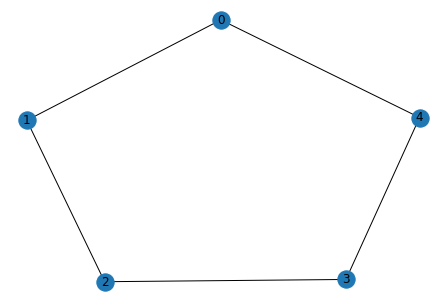

In [37]:
G = nx.Graph()
G.add_nodes_from([x for x in range(5)])  # 加点
G.add_edges_from([(a, (a+1)%5) for a in range(5)])  # 连线

nx.draw(G, with_labels=True)  # 画图G，with_labels是否显示标签
plt.show()

### 一些画图属性

### 节点布局

In [38]:
pos = nx.kamada_kawai_layout(G)


### 画图函数
nx.draw()函数

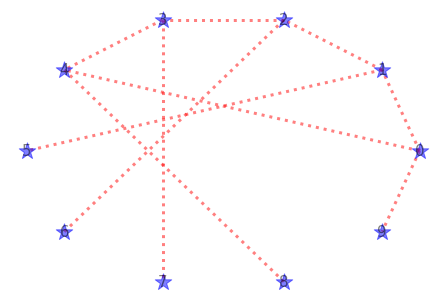

In [39]:
# Example:
G = nx.Graph()
G.add_nodes_from([x for x in range(10)])
G.add_edges_from([(a,(a+1)%5) for a in range(10)])

pos = nx.circular_layout(G)  # 环形布局
nx.draw(G, 
	pos=pos, with_labels=True, 
	node_size=300, node_color='blue', node_shape='*', 
	alpha=0.5, edge_color='red', 
	width=3, style='dotted', 
	font_size=15)
plt.show()

#### nx.draw_networkx() 函数

#### nx.draw_networkx_nodes() 画点

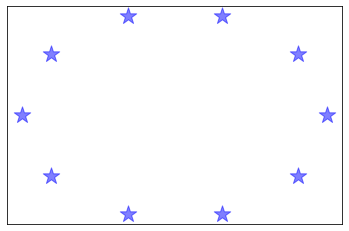

In [40]:
#example：
G = nx.Graph()
G.add_nodes_from([x for x in range(10)])
G.add_edges_from([(a, (a+1)%5) for a in range(10)])
pos = nx.circular_layout(G)
# 点和布局都没变，与前面一样，不过下面使用draw_networkx_nodes函数
nx.draw_networkx_nodes(G, pos=pos, node_size=300, node_color='blue', node_shape='*', alpha=0.5)
plt.show()

#### nx.draw_networkx_labels() 函数 

#### nx.draw_networkx_edges() 函数：

In [42]:
#Example：
#nx.draw_networkx_edges(G, pos=pos, with_labels=True, node_size=300, node_color='blue', node_shape='*', alpha=0.5, edge_color='red', width=3, style='dotted', font_size=15)

TypeError: draw_networkx_edges() got an unexpected keyword argument 'with_labels'

#### draw_networkx_edge_labels函数 

TypeError: draw_networkx_edges() got an unexpected keyword argument 'font_size'

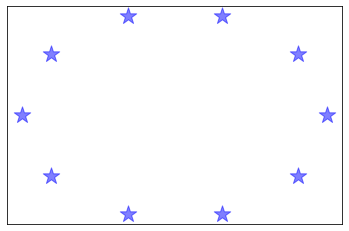

In [43]:
#上面几个函数可以搭配使用。
#比如整合画点、画边、画边的label三个函数，我们就可以画点、线和线的标签。
nx.draw_networkx_nodes(G, pos=pos, node_size=300, node_color='blue', node_shape='*', alpha=0.5)
nx.draw_networkx_edges(G, pos=pos, alpha=0.5, edge_color='red', width=3, style='dotted', font_size=15)
nx.draw_networkx_edge_labels(G, pos=pos, alpha=1, font_size=10)

#### 画不同种类的点 

有时候一个网络中有多种不同的节点或者不同的边，我们在可视化的时候，想要用不同颜色或者不同形状来表示不同类型的节点；或者我们希望节点的大小也能够根据节点的属性来动态调整。
此时，图中所有的点都是一个样子就不够了。我们需要为不同的节点设定不同的样式。




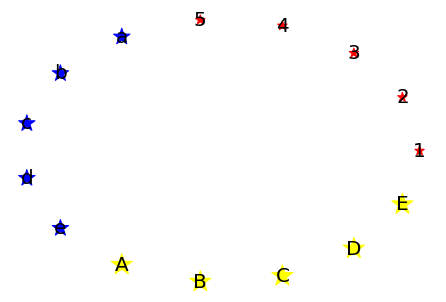

In [45]:
# Example：
# 有三类点：
A = [1, 2, 3, 4, 5]
B = ['a', 'b', 'c', 'd', 'e']
C = ['A', 'B', 'C', 'D', 'E']
# 有A,B,C三种类型的点，让这三种类型的点区分开来

G = nx.Graph()
# 添加点的时候指定属性
G.add_nodes_from(A, color='red', size=100)
G.add_nodes_from(B, color='blue', size=300)
G.add_nodes_from(C, color='yellow', size=500)

# 将各个点的属性抽取出来，组成列表
colors = [G.nodes[i]['color'] for i in G.nodes()]
sizes = [G.nodes[i]['size'] for i in G.nodes()]

pos = nx.circular_layout(G)
# 画图的时候指定属性即可
nx.draw(G, pos=pos, with_labels=True, node_size=sizes, node_color=colors, node_shape='*', alpha=1, font_size=20)
plt.show()


#不过这里只设置了不同的node_size 和 node_color，其他属性貌似不支持传入列表迭代，例如node_shape和alpha好像都不可以.如果想不同的点设置不同的node_shape或者alpha似乎只能通过分别画点来实现。

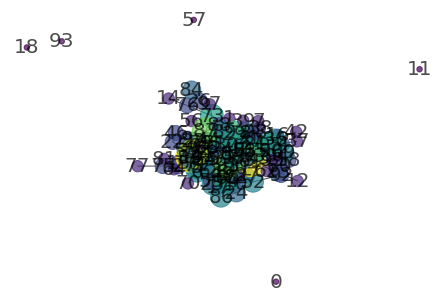

In [48]:
#当然也可以根据节点的度数来设置节点的大小，以此来凸显网络中较为重要的节点：

G = nx.Graph()  # 创建一个新的图G
G.add_nodes_from([x for x in range(100)])  # 添加100个节点
edges = [(a, b) for a, b in zip(np.random.randint(1, 100, 150), np.random.randint(1, 100, 150))]  # 随机产生150条边（可能有重复的边）
G.add_edges_from(edges)  # 添加边

sizes = [30 + G.degree(v) * 100 for v in G.nodes()]  # 得到每个节点的度数

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=sizes, node_color=sizes, node_shape='o', alpha=0.7, font_size=20)  # 将节点的度数设置为node_size 和 node_color
plt.show()

